In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Loading city bike data for April-October 2019
bikes04 = pd.read_csv('2019-04.csv')
bikes05 = pd.read_csv('2019-05.csv')
bikes06 = pd.read_csv('2019-06.csv')
bikes07 = pd.read_csv('2019-07.csv')
bikes08 = pd.read_csv('2019-08.csv')
bikes09 = pd.read_csv('2019-09.csv')
bikes10 = pd.read_csv('2019-10.csv')

In [3]:
#Re-naming columns for a better usability
bikes04.columns = ['Departure','Return','Dep_id',
                     'Dep_stn','Ret_id','Ret_stn','Cov_dist','Duration']
bikes05.columns = ['Departure','Return','Dep_id',
                     'Dep_stn','Ret_id','Ret_stn','Cov_dist','Duration']
bikes06.columns = ['Departure','Return','Dep_id',
                     'Dep_stn','Ret_id','Ret_stn','Cov_dist','Duration']
bikes07.columns = ['Departure','Return','Dep_id',
                     'Dep_stn','Ret_id','Ret_stn','Cov_dist','Duration']
bikes08.columns = ['Departure','Return','Dep_id',
                     'Dep_stn','Ret_id','Ret_stn','Cov_dist','Duration']
bikes09.columns = ['Departure','Return','Dep_id',
                     'Dep_stn','Ret_id','Ret_stn','Cov_dist','Duration']
bikes10.columns = ['Departure','Return','Dep_id',
                     'Dep_stn','Ret_id','Ret_stn','Cov_dist','Duration']

In [4]:
#Concantenating tables
bikesyear = pd.concat([bikes04, bikes05, bikes06, bikes07, bikes08, bikes09, bikes10], axis=0)

In [5]:
#Adding columns of date, hour (both based on departure time) and node
ind = pd.DatetimeIndex(bikesyear.Departure)
bikesyear['date'] = ind.date.astype('datetime64')
bikesyear['hour'] = ind.hour
bikesyear['Nodes'] = bikesyear['Dep_stn'] + " & " + bikesyear['Ret_stn']

In [6]:
#Same analysis can be made on mothly data
bikesyear.describe(include=['O'])

,Departure,Return,Dep_stn,Ret_stn,Nodes
count,3787948,3787948,3787948,3787889,3787889
unique,3174845,3182498,365,364,57295
top,2019-06-05T18:35:20,2019-07-31T17:59:07,Töölönlahdenkatu,Töölönlahdenkatu,"Aalto-yliopisto (M), Korkeakouluaukio & Jämerä..."
freq,9,8,84582,84399,14287


In [7]:
distover50000 = bikesyear[bikesyear['Cov_dist'] > 50000 ]
distover50000.head(2)

,Departure,Return,Dep_id,Dep_stn,Ret_id,Ret_stn,Cov_dist,Duration,date,hour,Nodes
39622,2019-04-29T07:26:42,2019-04-29T13:47:13,272,Marjaniementie,275.0,Itäkeskuksen metroasema,190216.67,22826,2019-04-29,7,Marjaniementie & Itäkeskuksen metroasema
92948,2019-04-26T11:12:54,2019-04-29T09:26:24,219,Näyttelijäntie,219.0,Näyttelijäntie,2106675.00,252801,2019-04-26,11,Näyttelijäntie & Näyttelijäntie


In [8]:
negativedist = bikesyear[bikesyear['Cov_dist'] < 0 ]
negativedist
#There is a negative distance value, which can spoil our statistics, let's remove it

,Departure,Return,Dep_id,Dep_stn,Ret_id,Ret_stn,Cov_dist,Duration,date,hour,Nodes
27803,2019-10-27T20:13:52,2019-10-27T20:23:02,579,Niittymaa,517.0,Länsituuli,-4290436.0,549,2019-10-27,20,Niittymaa & Länsituuli


In [9]:
bikesyear = bikesyear[bikesyear['Cov_dist'] > 0]

In [10]:
durover50000 = bikesyear[bikesyear['Duration'] > 50000 ]
durover50000.head(2)
#There are ~5000 trips with extremely large duration (several days). 
#We can see that they look feasible nad it will be interesting to analyze them separately, but for the main analysis would be better to remove them

,Departure,Return,Dep_id,Dep_stn,Ret_id,Ret_stn,Cov_dist,Duration,date,hour,Nodes
574,2019-04-30T23:10:20,2019-05-02T15:43:34,719,Säteri,711.0,Kirjurinkuja,1114.0,145988,2019-04-30,23,Säteri & Kirjurinkuja
804,2019-04-30T22:51:06,2019-05-01T14:30:05,145,Pohjolankatu,146.0,Pohjolanaukio,724.0,56333,2019-04-30,22,Pohjolankatu & Pohjolanaukio


In [11]:
bikesyear_filtered = bikesyear[bikesyear['Cov_dist'] < 50000]

In [12]:
bikesyear_filtered = bikesyear_filtered[bikesyear_filtered['Duration'] < 50000]

In [13]:
#Attaching ID to each journey 
bikesyear_filtered.insert(0, 'ID', range(0, 0 + len(bikesyear_filtered)))

In [14]:
#Same thing, but with a smaller dataset (for May)
bikesyear05_filtered = bikes05[bikes05['Cov_dist'] < 50000]

In [15]:
bikesyear05_filtered = bikesyear05_filtered[bikesyear05_filtered['Duration'] < 50000]

In [38]:
bikesyear05_filtered.insert(0, 'ID', range(0, 0 + len(bikesyear05_filtered)))

In [39]:
#Adding columns of date, hour (both based on departure time) and node
ind1 = pd.DatetimeIndex(bikesyear05_filtered.Departure)
bikesyear05_filtered['date'] = ind1.date.astype('datetime64')
bikesyear05_filtered['hour'] = ind1.hour
bikesyear05_filtered['Nodes'] = bikesyear05_filtered['Dep_stn'] + " & " + bikesyear05_filtered['Ret_stn']

In [14]:
bikesyear_filtered.Dep_stn.value_counts()

Töölönlahdenkatu          82624
Itämerentori              71781
Rautatientori / länsi     45395
Ympyrätalo                44667
Rautatientori / itä       44369
                          ...  
Puotilan metroasema         840
Itäkeskus Metrovarikko      257
Workshop Helsinki            99
Workshop Konala               2
Ruomelantie***                1
Name: Dep_stn, Length: 364, dtype: int64

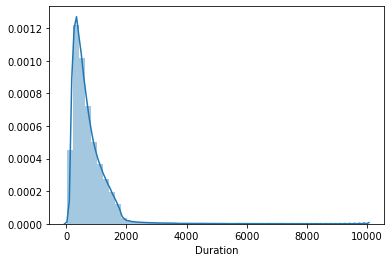

In [15]:
cl_b = bikesyear_filtered[(bikesyear_filtered['Duration'] <= 10000)] 
sns.distplot(cl_b['Duration'])
#Here we see that on a yearly basis the greater share of trips has duration of <= 2000 seconds (~33 minutes)
#Most probably this is due to the fact that HSL starts charging customers after 30th minute

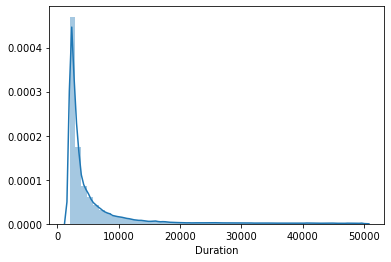

In [16]:
cl_c = bikesyear_filtered[(bikesyear_filtered['Duration'] >= 2000)] 
sns.distplot(cl_c['Duration'])
#This is a chart of all durations exceeding 30 minutes of ride
#We see that the decline is exponential

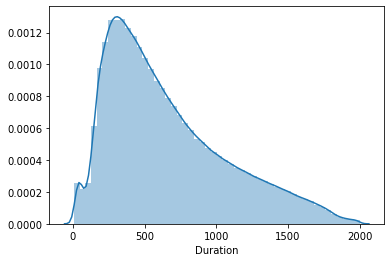

In [11]:
cl_d = bikesyear[(bikesyear['Duration'] <= 2000)] 
sns.distplot(cl_d['Duration'])
#There are relatively many rides with ride time close to zero
#The most common ride time is ~500 seconds (~9 minutes)

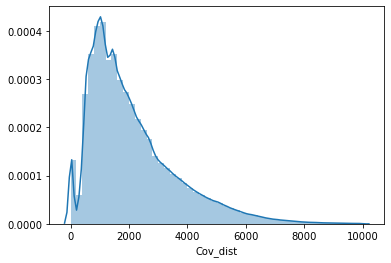

In [17]:
cl_e = bikesyear[(bikesyear['Cov_dist'] <= 10000)] 
sns.distplot(cl_e['Cov_dist'])
#The curve of covered distances is much smoother compared to the trip durations
#Again, there are several values with distances close to zero

In [14]:
bikesyear['rel'] = bikesyear['Cov_dist'] / bikesyear['Duration'] 
#Let's measure the relation of covered distance vs duration (the bigger - the faster the rider is)

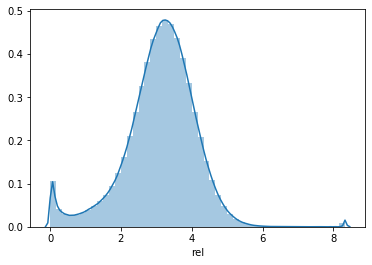

In [15]:
p_b = bikesyear[(bikesyear['rel'] <= 10000)] 
sns.distplot(p_b['rel'])
#The most average speed is then around 10-12 km/h, after 20 km/h is is virtually zero
#However, there are several trips with the average trip of ~30 km/h
#Let's look closer to them to find out, whether they are real - it is a realy interesting group

In [16]:
speedy = bikesyear[bikesyear['rel'] > 8 ]
speedy

,Departure,Return,Dep_id,Dep_stn,Ret_id,Ret_stn,Cov_dist,Duration,date,hour,Nodes,rel
1467,2019-04-30T21:54:42,2019-04-30T21:55:48,16,Liisanpuistikko,16.0,Liisanpuistikko,516.67,62,2019-04-30,21,Liisanpuistikko & Liisanpuistikko,8.333387
1699,2019-04-30T21:32:35,2019-04-30T21:54:12,128,Päijänteentie,63.0,Jätkäsaarenlaituri,10483.33,1258,2019-04-30,21,Päijänteentie & Jätkäsaarenlaituri,8.333331
2009,2019-04-30T21:10:47,2019-04-30T21:25:29,117,Brahen puistikko,138.0,Arabiankatu,7308.33,877,2019-04-30,21,Brahen puistikko & Arabiankatu,8.333330
2157,2019-04-30T21:00:53,2019-04-30T21:09:55,132,Hollolantie,119.0,Gebhardinaukio,4466.67,536,2019-04-30,21,Hollolantie & Gebhardinaukio,8.333340
3115,2019-04-30T19:57:39,2019-04-30T20:02:44,76,Olympiastadion,79.0,Uimastadion,2508.33,301,2019-04-30,19,Olympiastadion & Uimastadion,8.333322
...,...,...,...,...,...,...,...,...,...,...,...,...
259594,2019-10-01T07:32:55,2019-10-01T07:33:45,139,Kaironkatu,139.0,Kaironkatu,383.33,46,2019-10-01,7,Kaironkatu & Kaironkatu,8.333261
259802,2019-10-01T07:13:05,2019-10-01T07:13:30,44,Sörnäinen (M),44.0,Sörnäinen (M),175.00,21,2019-10-01,7,Sörnäinen (M) & Sörnäinen (M),8.333333
259863,2019-10-01T07:06:42,2019-10-01T07:11:59,201,Länsisatamankuja,6.0,Hietalahdentori,2600.00,312,2019-10-01,7,Länsisatamankuja & Hietalahdentori,8.333333
260195,2019-10-01T03:27:30,2019-10-01T03:51:40,56,Luoteisväylä,41.0,Ympyrätalo,12058.33,1447,2019-10-01,3,Luoteisväylä & Ympyrätalo,8.333331


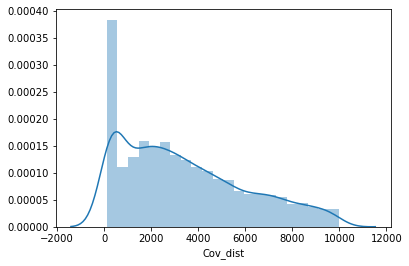

In [17]:
sp = speedy[(speedy['Cov_dist'] <= 10000)] 
sns.distplot(sp['Cov_dist'])
#It is quite probable that a 'speedy' racer would ride only a few meters, but there are still many of such cyclists who cycled for longer distances

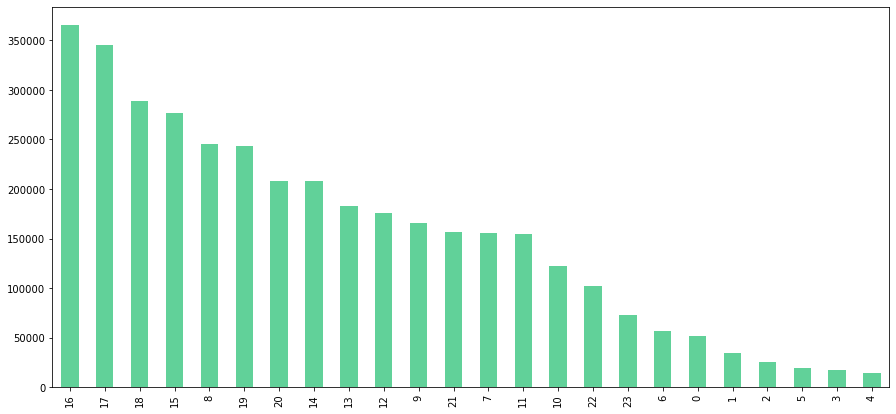

In [18]:
bikesyear['hour'].value_counts()[:24].plot(kind="bar", figsize=(15,7), color="#61d199")
#The most popular time for the city bike usage is afternoon and evening! Suprisingly, there are relatively few trips in the morning

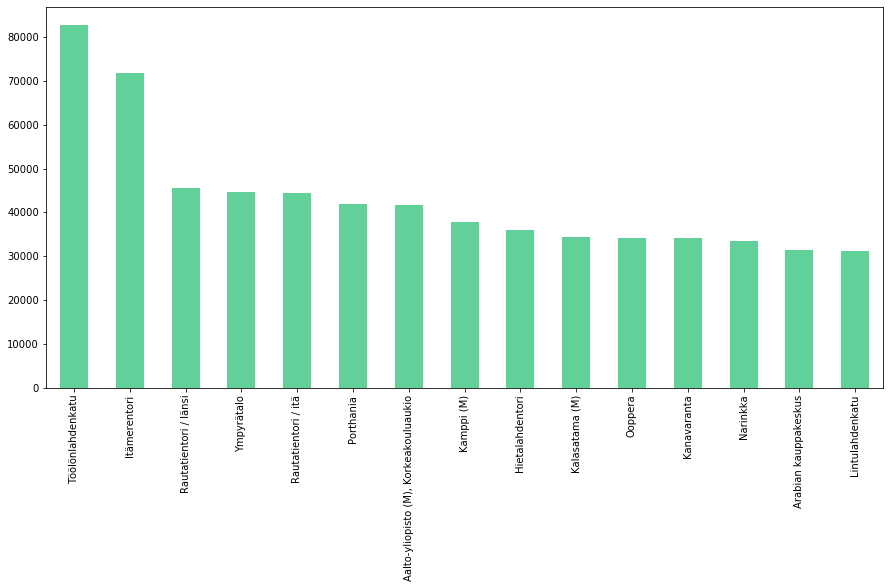

In [19]:
bikesyear['Dep_stn'].value_counts()[:15].plot(kind="bar", figsize=(15,7), color="#61d199")

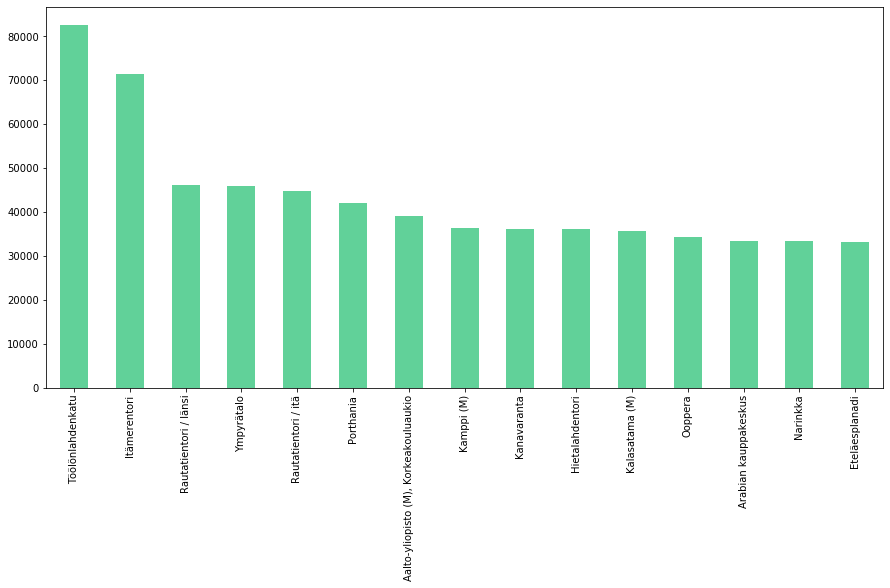

In [20]:
bikesyear['Ret_stn'].value_counts()[:15].plot(kind="bar", figsize=(15,7), color="#61d199")
#Lists of most popular departure and return stations are almost identical

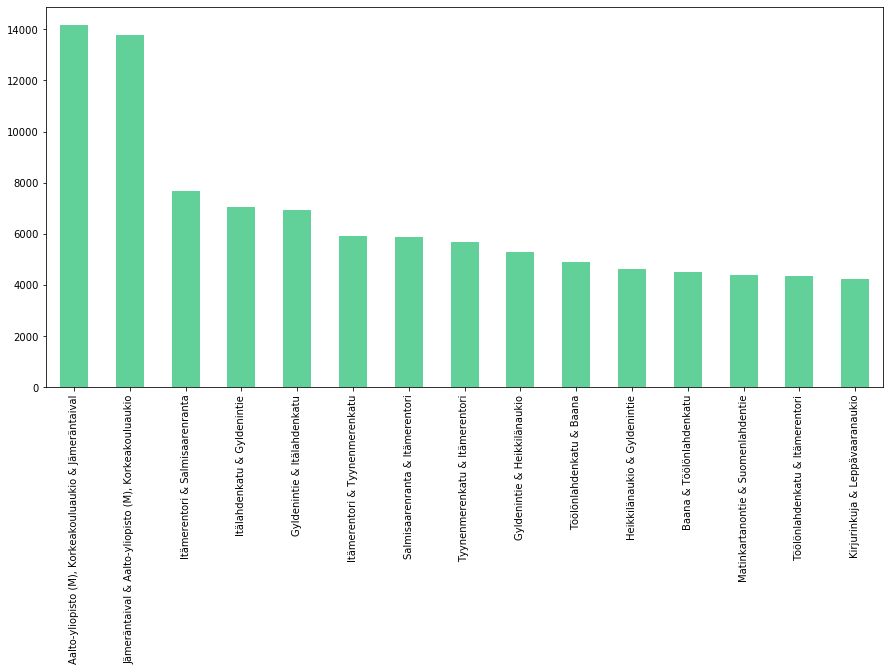

In [21]:
bikesyear['Nodes'].value_counts()[:15].plot(kind="bar", figsize=(15,7), color="#61d199")
#Most popular nodes. We see that the leaders are Otaniemi<->Teekkarikylä and routes from Ruoholahti(M) to neihboring areas (Ruoholahti, Lauttasaari, Jätkäsaari)

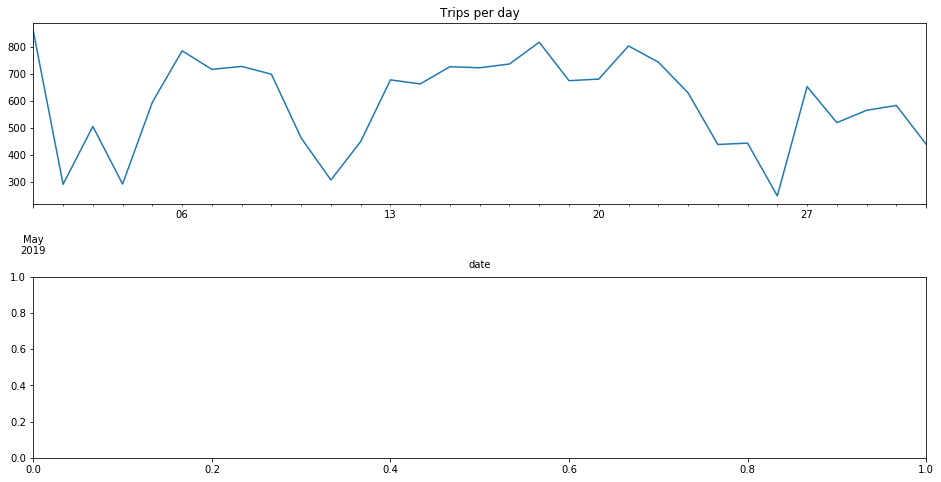

In [23]:
by_date = bikesyear05_filtered.pivot_table('ID', aggfunc='count',
                            index='date',
                            columns='Cov_dist', )
fig, ax = plt.subplots(2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:, 0].plot(ax=ax[0], title='Trips per day');
#This is a code for plotting the covered distance per day based on journey ID, but I can run it only on a small dataset (May) - otherwise kernel restarts

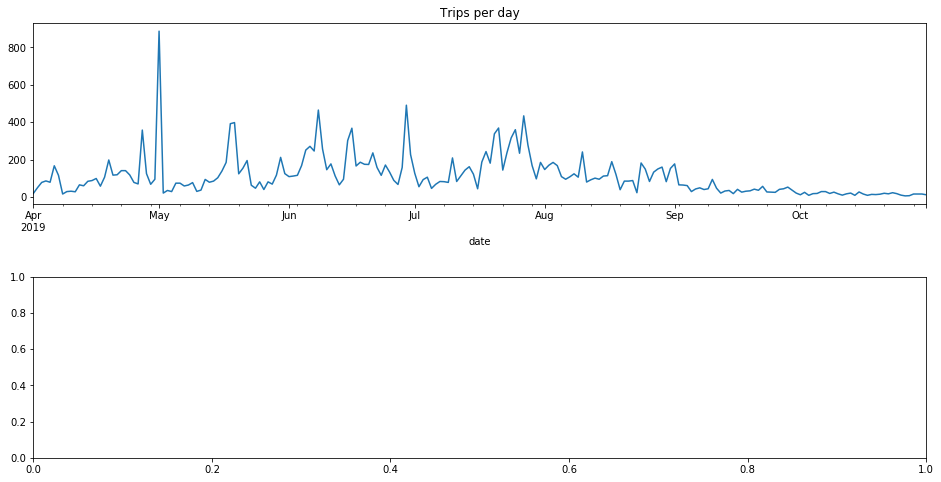

In [9]:
by_date = bikesyear.pivot_table('Return', aggfunc='count',
                            index='date',
                            columns='Dep_id', )
fig, ax = plt.subplots(2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:, 0].plot(ax=ax[0], title='Trips per day');
#This chart counts departure stops, from here the popularity of city bikes during each eason also can be tracked 

In [10]:
#Let's split our trips based on time of day
morning = bikesyear[(bikesyear['hour'] >=5) & (bikesyear['hour'] <=10 )]
day = bikesyear[(bikesyear['hour'] >10) & (bikesyear['hour'] <16 )]
evening = bikesyear[(bikesyear['hour'] >=16) & (bikesyear['hour'] <=24 )]
night = bikesyear[(bikesyear['hour'] <5)]

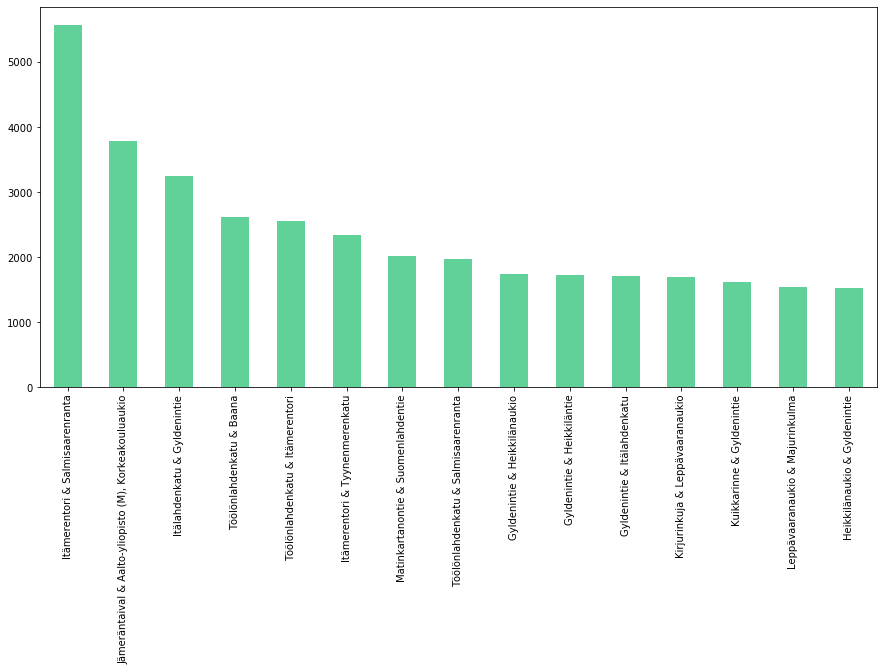

In [11]:
morning['Nodes'].value_counts()[:15].plot(kind="bar", figsize=(15,7), color="#61d199")

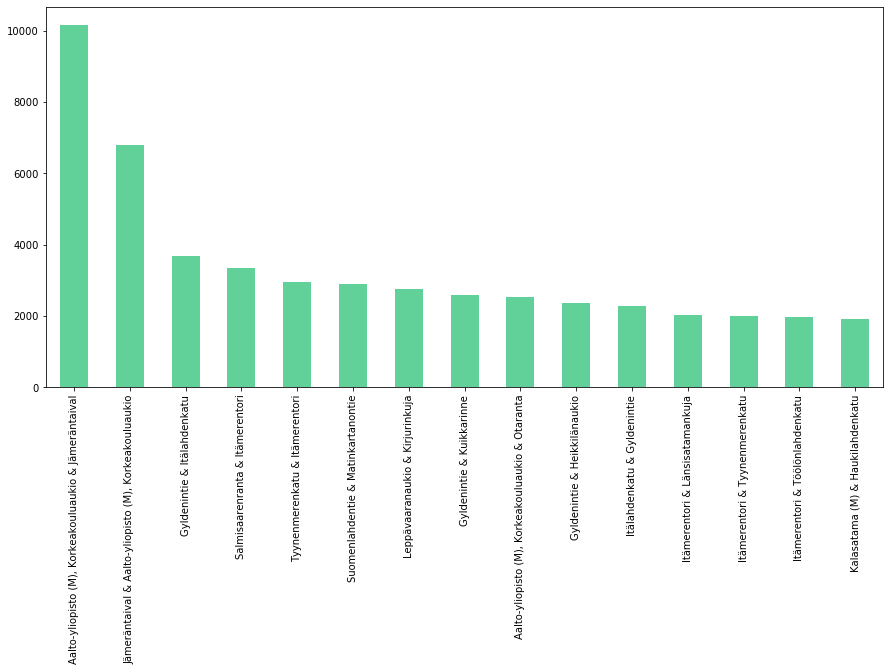

In [12]:
evening['Nodes'].value_counts()[:15].plot(kind="bar", figsize=(15,7), color="#61d199")
#WE see that some nodes on the morning/evening times are opposite to each other

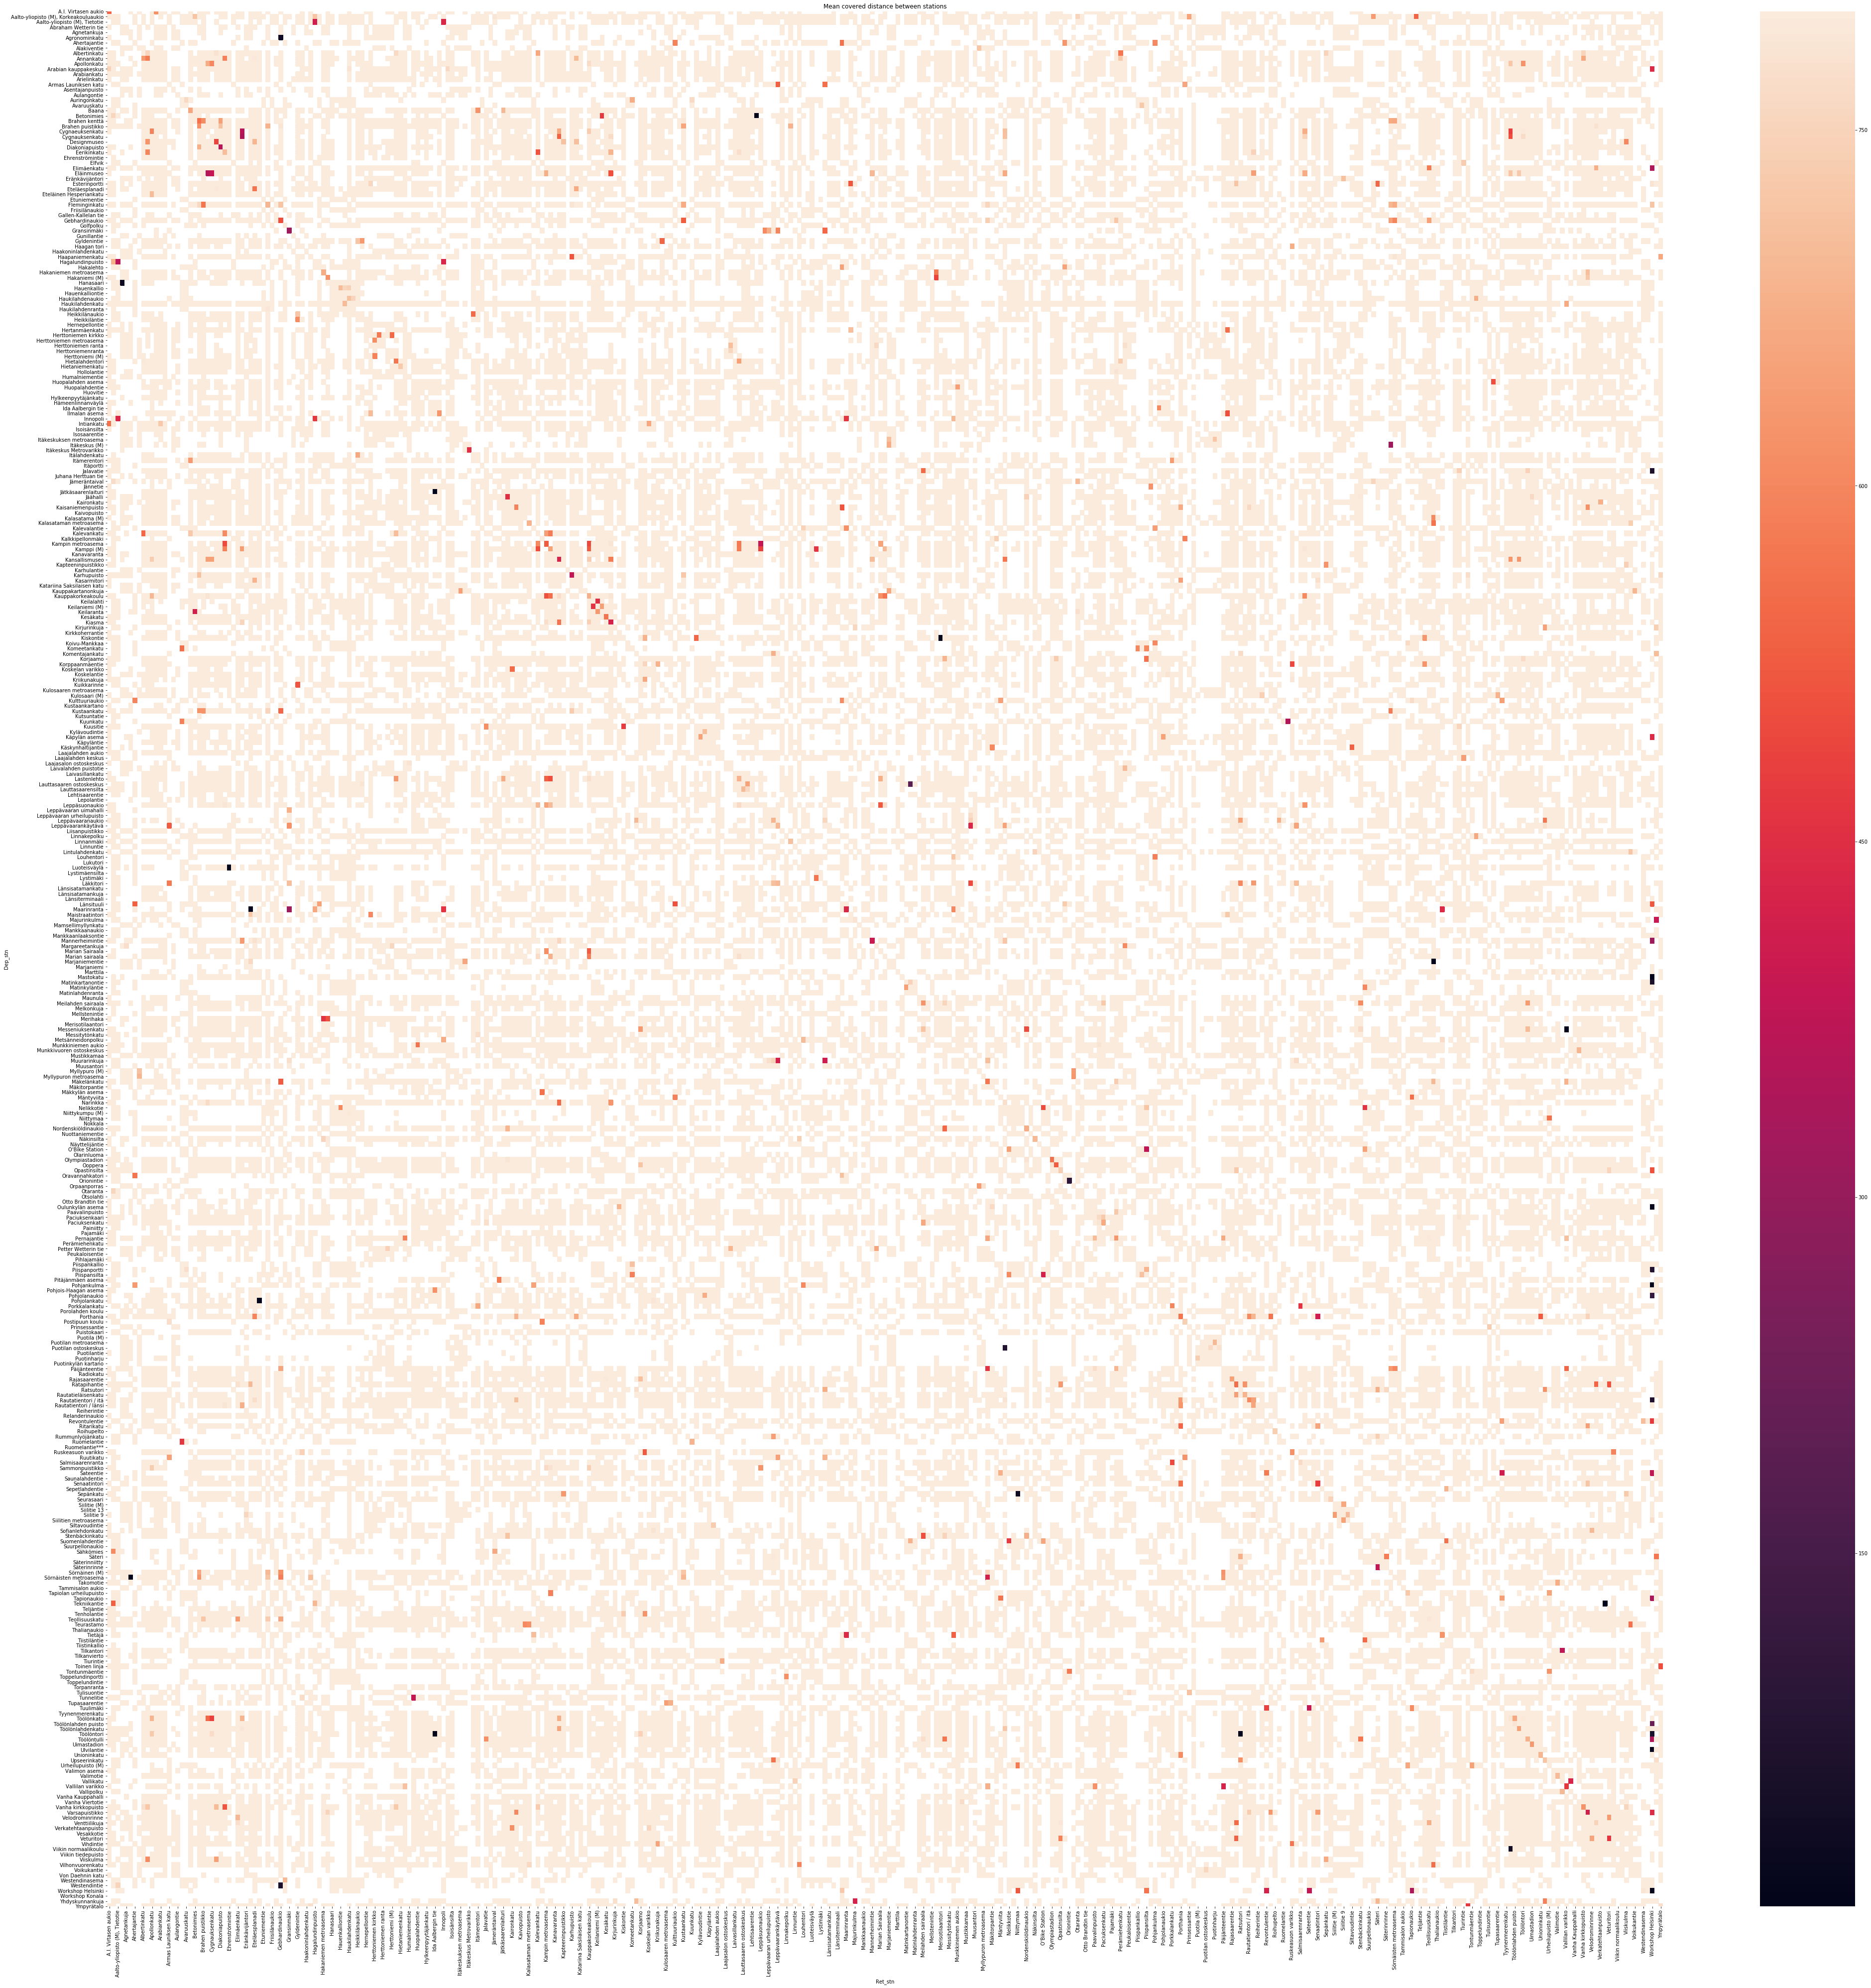

In [18]:
# Examining traffic between stations

counts_per_endStation = bikesyear[bikesyear['Cov_dist'] <= 10000000].groupby(['Dep_stn','Ret_stn'])['Cov_dist'].mean()
counts_per_endStation  = counts_per_endStation.unstack(level=1)
plt.figure(figsize = (70,70))
h = sns.heatmap(counts_per_endStation ,linewidths=0, square=False , vmax=800)
h = plt.xticks(rotation='vertical')
h= plt.yticks(rotation='horizontal')
plt.title('Mean covered distance between stations')
plt.savefig('HeatMap_StationUsage_distance.png')
#A bit crazy heamap, but based on that we can detect, which stations are close to each other (based on the shortest covered distance of trips between them)

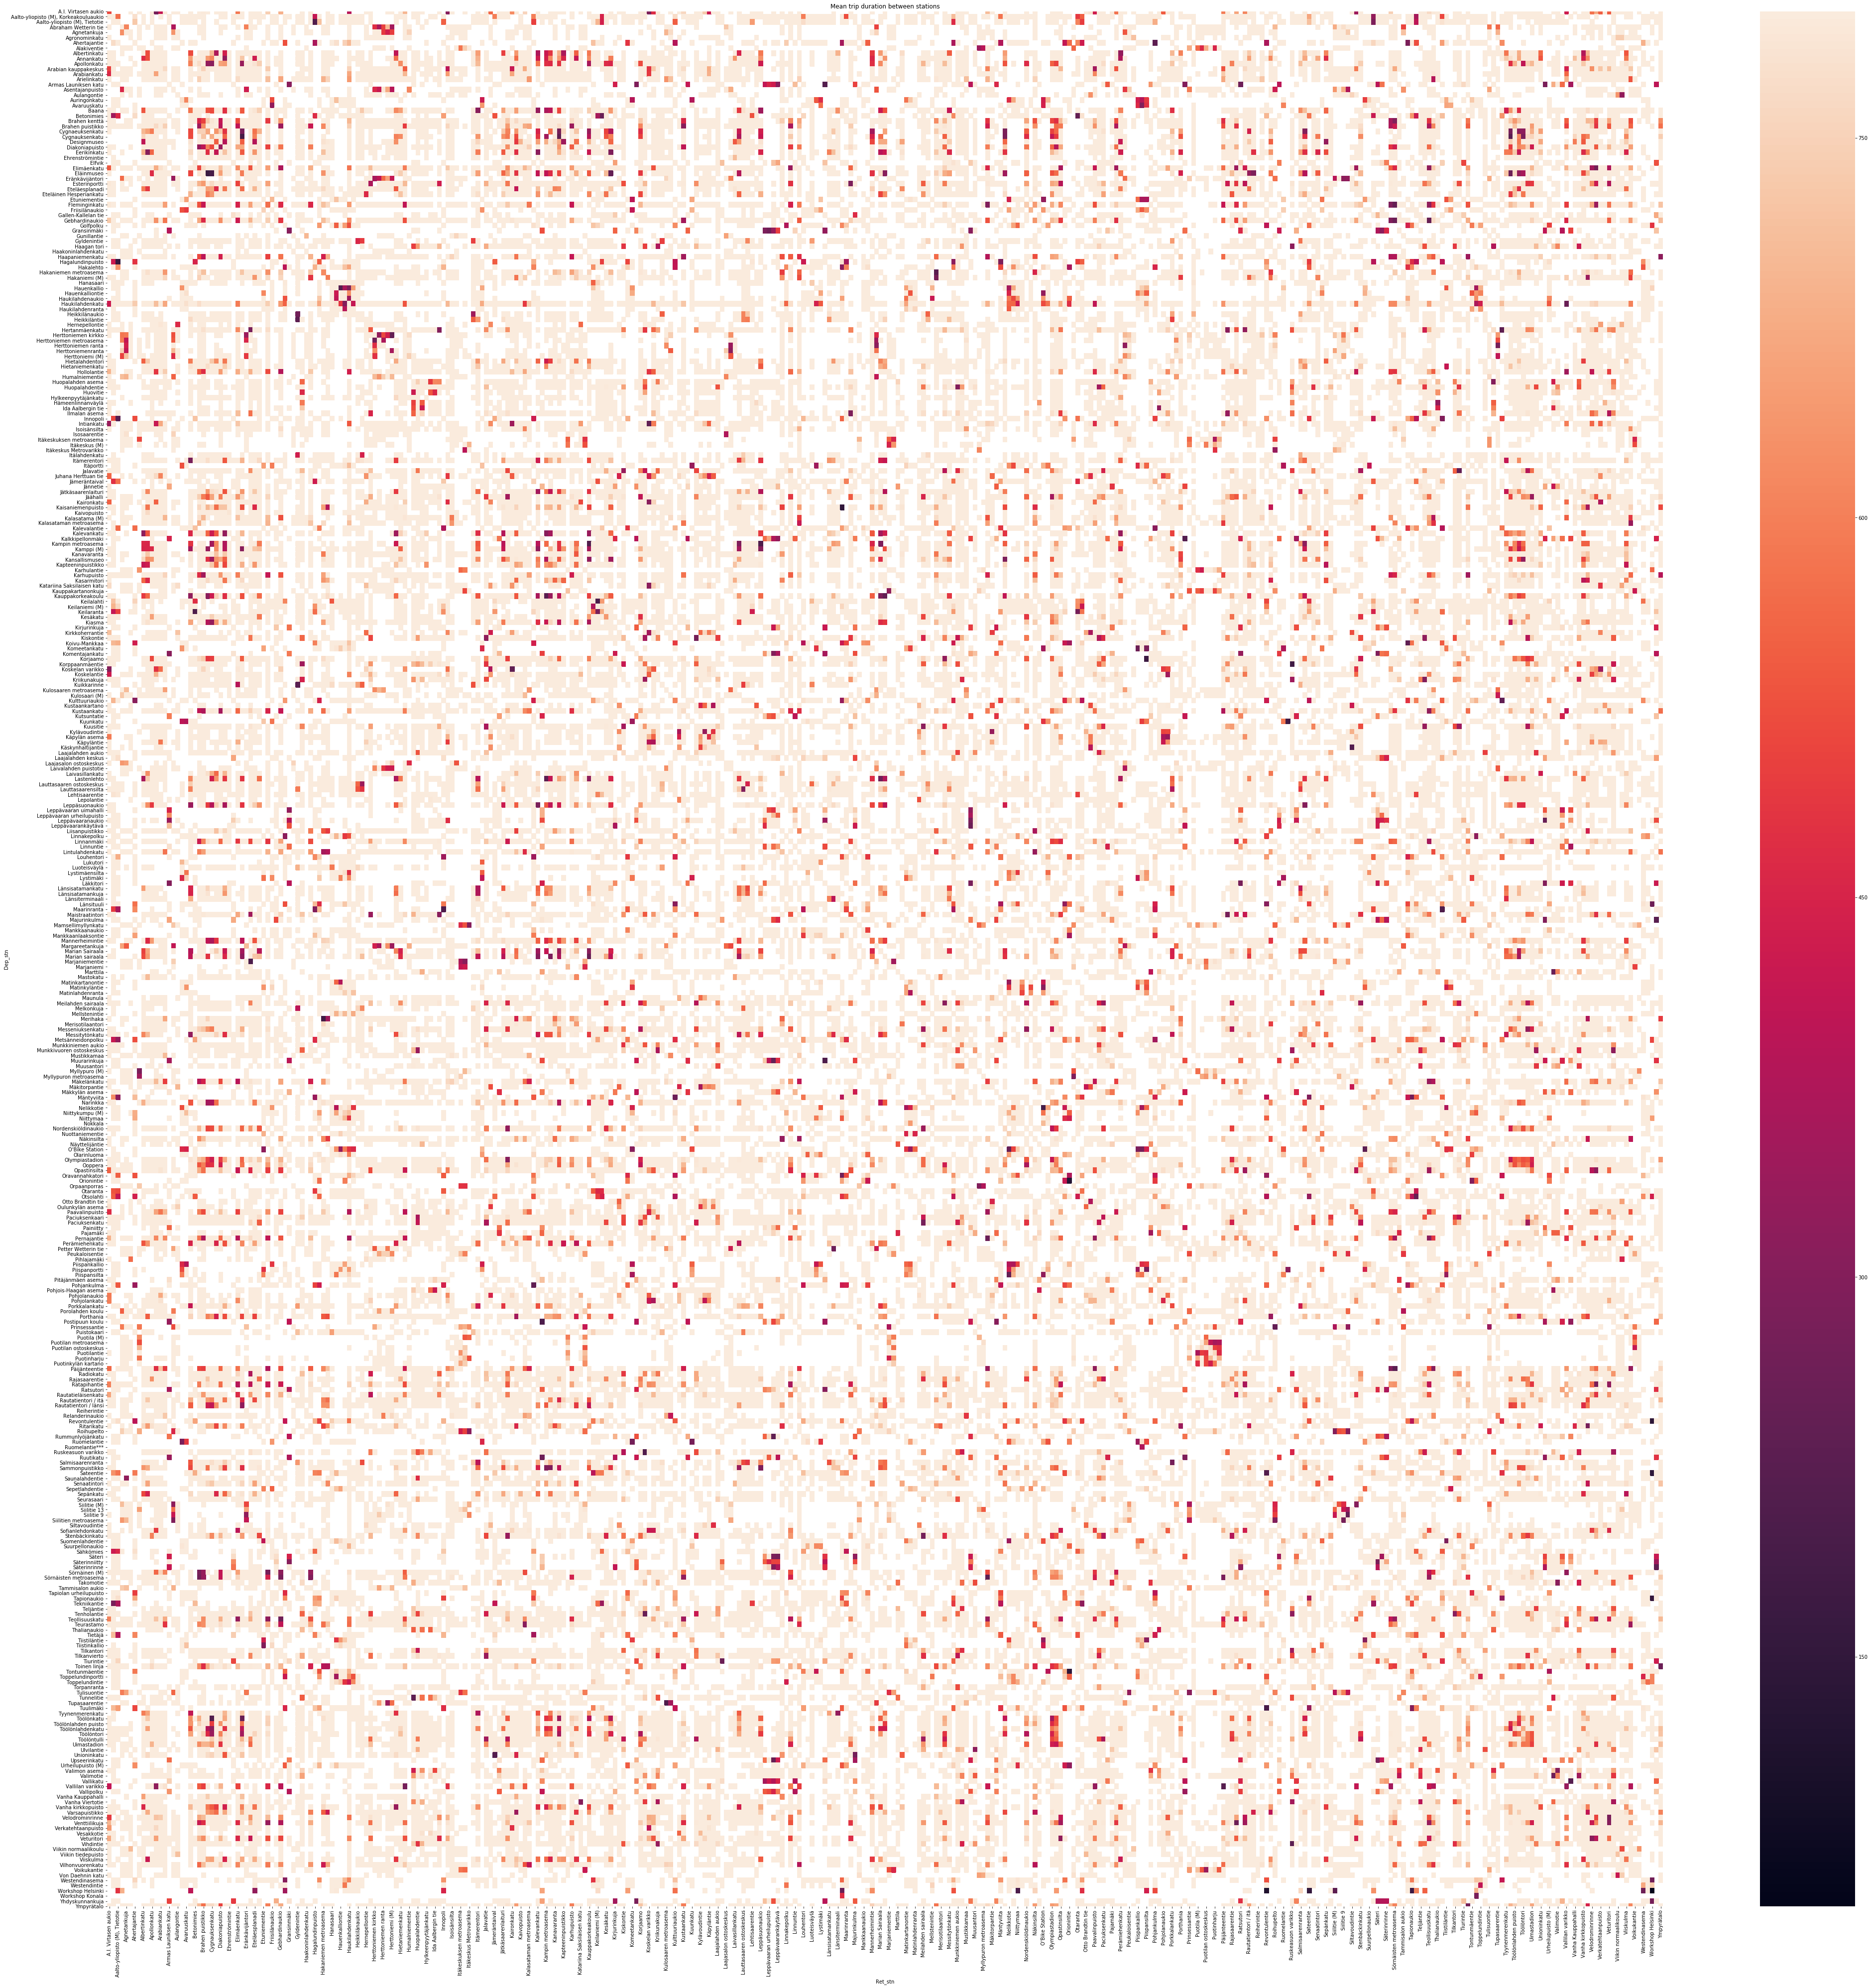

In [21]:
counts_per_endStation1 = bikesyear[bikesyear['Duration'] <= 10000000].groupby(['Dep_stn','Ret_stn'])['Duration'].mean()
counts_per_endStation1  = counts_per_endStation1.unstack(level=1)
plt.figure(figsize = (70,70))
h = sns.heatmap(counts_per_endStation1 ,linewidths=0, square=False , vmax=800)
h = plt.xticks(rotation='vertical')
h= plt.yticks(rotation='horizontal')
plt.title('Mean trip duration between stations')
plt.savefig('HeatMap_StationUsage_duration.png')
#Same chart for trip durations, here it is even more interesting to compare values!

In [29]:
#Let's analyse the distances numerically
dover5000 = bikesyear[bikesyear['Cov_dist'] >= 5000]
dover2000 = bikesyear[bikesyear['Cov_dist'] >= 2000]
dunder1000 = bikesyear[bikesyear['Cov_dist'] <= 1000]
middledist = bikesyear[(bikesyear['Cov_dist']>1000) & (bikesyear['Cov_dist']<2000)]

In [30]:
print(len(dover5000))
print(len(dover2000))
print(len(middledist))
print(len(dunder1000))

222286
1549070
1237904
900739


In [40]:
n = 10
print(dunder1000['Dep_stn'].value_counts()[:n])
#Bike stations near universities and big tansport hubs are extremely popular for short trips

Aalto-yliopisto (M), Korkeakouluaukio    25757
Itämerentori                             20462
Porthania                                14885
Jämeräntaival                            14188
Gyldenintie                              13615
Töölönlahdenkatu                         12264
Kamppi (M)                               12144
Leppävaaranaukio                          9331
Vanha kirkkopuisto                        8755
Rautatientori / itä                       8741
Name: Dep_stn, dtype: int64


In [41]:
print(dover5000['Dep_stn'].value_counts()[:n])
#On opposite, long journeys often start in more suburban areas without metro stations nearby, such as Laajalahti, Arabia, Kaivopuisto and Meilahti

Aalto-yliopisto (M), Korkeakouluaukio    2818
Arabian kauppakeskus                     2558
Itämerentori                             2523
Laajalahden aukio                        2501
Töölönlahdenkatu                         2499
Lauttasaaren ostoskeskus                 2156
Kaivopuisto                              2099
Rautatientori / itä                      2065
Tilkanvierto                             2025
Ympyrätalo                               1931
Name: Dep_stn, dtype: int64
